In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time

#For plotting purposes
%matplotlib inline

#Load the data
data = pd.read_csv('census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
#Describe the data 
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [3]:
#Total number of records
n_records = len(data)

#Number of people with income <50k
n_at_most_50k = len(data[data['income']=="<=50K"])

#Number of people with income >=50k
n_greater_50k = len(data[data['income']==">50K"])

#Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014


In [4]:
at_most_percent = ((n_at_most_50k * 100.0)/ (n_records*1.0))
print("Percentage of individuals making at most $50,000: {:.2f}%".format(at_most_percent))

Percentage of individuals making at most $50,000: 75.22%


From above percentage, it's clear that most people make less than 50k. This can severely affect our accuracy as we could simply say, "This person is making less than 50K" and be right without seeing the data. Making such a statement would be naive. So, it's important to see the naive prediction for the data, to establish a benchmark if data is performing well or not.

In [5]:
#Calculate accuracy
accuracy = ((n_at_most_50k * 100.0)/ (n_records*1.0) )/100

#Print the results 
print("Naive Predictor: Accuracy score: {:.4f}".format(accuracy))

Naive Predictor: Accuracy score: 0.7522


In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [7]:
features_raw.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Capital-gain and capital-loss have ~75% data as 0 as max value very high. These features are highly skewed. We can apply logarithmic transformations to them so that it doesn't affect the performance. However, care must be taken while applying log transformation as log 0 would not be defined. We could translate the value by small quantity before applying log.

In [8]:
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

In [9]:
features_raw.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,0.740759,0.355489,40.938017
std,13.217870,2.552881,2.466527,1.595914,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000


In [10]:
#Feature Scaling on all numerical values.

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
features_raw.head(n = 1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [11]:
#One-hot encoding the categorical variables
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [12]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Before implementing any classifier for our dataset, let's define a function to capture various paramters we could consider for efficiency of algorithm.

In [13]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 

    results = {}
    
    start = time()
    learner.fit(X_train, y_train)
    end = time()
    
    results['train_time'] = end - start
        
    start = time()
    predictions_test = learner.predict(X_test)
    end = time()

    results['pred_time'] = end - start
        
    #Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
        
    # Return the results
    return results

We have considered training and prediction time, and accuracy and fscore to judge an algorithm

I have considered 3 algorithms initially- SVM, Naive Bayes and Random Forest. I am listing applications, advantages, disadvantages and why I considered them for this dataset below. Also, below are references I used for finding real-world applications for each algorithms.

Algorithm: SVM<br>
Industry Applications: bioinformatics (Protein classification, cancer classification)<br>
Advantages: flexibility in choosing similarity functions, can handle large number of features well, can be simplified to a convex optimization problem<br>
Disadvantages: Sensitive to noisy and skewed data<br>
Why I considered this?: Large number of features and nature of data (two labels and not highly unbalanced)<br><br>

Algorithm: Random Forest Classifier<br>
Industry Applications: remote sensing<br>
Advantages: High accuracy, capability of handling higher dimensional features well, less training time<br>
Disadvantages: Slow to create predictions, not highly descriptive<br>
Why I considered this?: Effectiveness with large data and accuracy and simplicity of algorithm<br><br>

Algorithm: Gaussian NB<br>
Industry Applications: NLP, spam classification<br>
Advantages: Works well in complex, real-world situations<br>
Disadvantages: Relies on independence assumption, does not work well on too many features<br>
Why I considered this?: Simple algorithm for classification problems<br><br>

References:<br>
www.baskent.edu.tr/~hogul/svm_tutorial.ppt<br>
http://www.sciencedirect.com/science/article/pii/S0924271616000265<br>
http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html

In [14]:
#Import the three supervised learning models from sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Initialize the three models
clf_A = RandomForestClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = LinearSVC(random_state=42)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = \
    train_predict(clf, X_train, y_train, X_test, y_test)

In [15]:
results

{'GaussianNB': {'acc_test': 0.60829187396351581,
  'f_test': 0.42811288507232487,
  'pred_time': 0.0254361629486084,
  'train_time': 0.10424184799194336},
 'LinearSVC': {'acc_test': 0.85074626865671643,
  'f_test': 0.70543374642516665,
  'pred_time': 0.010348081588745117,
  'train_time': 0.7873306274414062},
 'RandomForestClassifier': {'acc_test': 0.84311774461028188,
  'f_test': 0.68432224805417974,
  'pred_time': 0.03212285041809082,
  'train_time': 0.5675880908966064}}

1. Random Forest is the most appropriate model. Although, it might take more time on testing set (compared to others), but time for training and accuracy/F-Score is decent.

2. Accuracy/F-score is slighly higher on test set for SVC, but long training time might make it difficult for tuning hyperparameters later.

3. Naive Bayes has fastest speed for training and least variance of scores between training and testing, however the score is really low.

Random Forest is an ensemble method of Machine Learning for regression and classification purposes. It creates a multitudes of decision trees while training time. It overcomes shortcomings of decision trees by avoiding overfitting. 

In very simple terms, Random forest builds multiple decision trees with different number of observations and initial variables. The final prediction is a function of all predicitions.

With increase in computational power, it has become really fast to implement complex algorithms now. Random Forest works on training set in very less time. Although, it takes slightly more time on testing set and can't describe relationships in the data really well.

Lets now try to tune Random Forest parameters and see if we can get better accuracy.

In [17]:
#Import 'GridSearchCV', 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

#Initialize the classifier
clf = RandomForestClassifier()

#Create the parameters list we wish to tune
parameters = {'n_estimators': [10,50,100],
             'min_samples_split': [2,10,20,50],
             'max_features': ['sqrt', 'log2', 'auto']}

#Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

#Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the best model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8375
F-score on testing data: 0.6715

Optimized Model
------
Final accuracy score on the testing data: 0.8632
Final F-score on the testing data: 0.7360


In [18]:
# create a feature numerically representative of different capital gains catergories 
def cap_split(row):
    if row['capital-gain'] > 0 and row['income'] == 1:
        return 1
    elif row['capital-gain'] > 0 and row['income'] == 0:
        return 2
    elif row['capital-gain'] <= 0 and row['income'] == 1:
        return 3
    else:
        return 4
    
data['cap_split'] = data.apply (lambda row: cap_split (row), axis=1)

In [19]:
# def that will display the percentage and absolute value on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

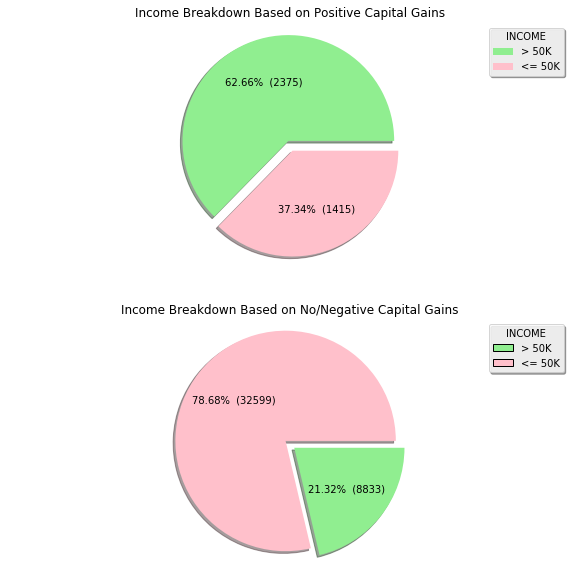

In [20]:
# pie charts separating the Pos Capital Gains vs. the Neg/No Capital Gains
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

caphigh = data[data['capital-gain'] > 0]
caplow = data[data['capital-gain'] <= 0]

caphigh_val = caphigh.income.value_counts()
caplow_val = caplow.income.value_counts()
colors1 = ['lightgreen', 'pink']
colors2 = ['pink', 'lightgreen']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
plt.pie(caphigh_val, shadow=True, explode=[0.1, 0], colors=colors1, autopct=make_autopct(caphigh_val))
plt.axis('equal')
plt.title('Income Breakdown Based on Positive Capital Gains')
plt.legend(labels=['> 50K', '<= 50K'], frameon=True, shadow=True, title='INCOME')

ax2 = fig.add_subplot(2, 1, 2)
plt.pie(caplow_val, shadow=True, explode=[0.1, 0], colors=colors2, autopct=make_autopct(caplow_val))
plt.axis('equal')
plt.title('Income Breakdown Based on No/Negative Capital Gains')
ax2_patch1 = mpatches.Patch(facecolor='lightgreen',  edgecolor='black', label='> 50K')
ax2_patch2 = mpatches.Patch(facecolor='pink',  edgecolor='black', label='<= 50K')
plt.legend(handles=[ax2_patch1, ax2_patch2], frameon=True, shadow=True, title='INCOME')

plt.show()